In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [53]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [54]:
inspector = inspect(engine)

In [55]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [56]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [68]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [58]:
import datetime as dt

In [59]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [84]:
prcp =[Measurement.date,
               Measurement.prcp]

In [88]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date_filter='2016-08-22'
data_prcp=session.query(*prcp).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) > date_filter). group_by(func.strftime("%m", Measurement.date)).all()
data_prcp

[('2017-01-01', 0.0),
 ('2017-02-01', 0.0),
 ('2017-03-01', 1.19),
 ('2017-04-01', 0.0),
 ('2017-05-01', 0.26),
 ('2017-06-01', 0.0),
 ('2017-07-01', 0.02),
 ('2016-08-23', 0.0),
 ('2016-09-01', 0.0),
 ('2016-10-01', 0.0),
 ('2016-11-01', 0.0),
 ('2016-12-01', 0.12)]

In [78]:
date_prcp = [r[0] for r in data_prcp[:]]
scores_prcp = [r[1] for r in data_prcp[:]]

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

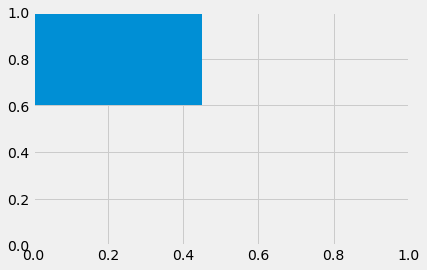

In [80]:
fig, ax = plt.subplots()
ypos = range(1, len(scores_prcp)+1)
ax.barh(ypos, scores_prcp[::-1])
ax.set_xlabel("precipitation")
ax.set_ylabel("date")
ax.set_yticks(ypos)
ax.set_yticklabels(date_prcp[::-1])
ax.set_title("Precipitation")
fig.tight_layout()
plt.show()

In [ ]:

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()